<a href="https://colab.research.google.com/github/eugenials/Lab-PDI/blob/main/Pr%C3%A1ctica_3_Operaciones_aritm%C3%A9ticas_y_l%C3%B3gicas_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Práctica 3.- Operaciones aritméticas y lógicas.

Integrantes:
*   Eugenia López Silva
*   Mariana Marcela Sepulveda Sanchez
*   Alonso Flores Eguia



**Librerias:**

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

**Parte I : Operaciones aritmeticas**

Ejercicio 1: Suma de imágenes.

1. Cargar dos imágenes médicas en escala de grises del mismo tamaño, en caso contrario, ajustar a la misma resolución.

In [6]:
# Cargar dos imágenes medicas en escalas de grises
imagen2 = cv2.imread('imagen 1.jpeg' , cv2.IMREAD_GRAYSCALE)
imagen1 = cv2.imread('imagen 2.jpg', cv2.IMREAD_GRAYSCALE)

# Redimensionar ambas imágenes al mismo tamaño
imagen2_res = cv2.resize(imagen2, (imagen1.shape[1], imagen1.shape[0]))

2. Aplicar la suma ponderada con diferentes pesos

In [7]:
# Aplicar la suma ponderada con pesos α=0.7 y β=0.3
alpha = 0.5  # Peso de la primera imagen
beta = 0.9   # Peso de la segunda imagen
gamma = 15     # Ajuste de brillo

imagen_resultado = cv2.addWeighted(imagen1, alpha, imagen2_res, beta, gamma)

Resultados suma ponderada

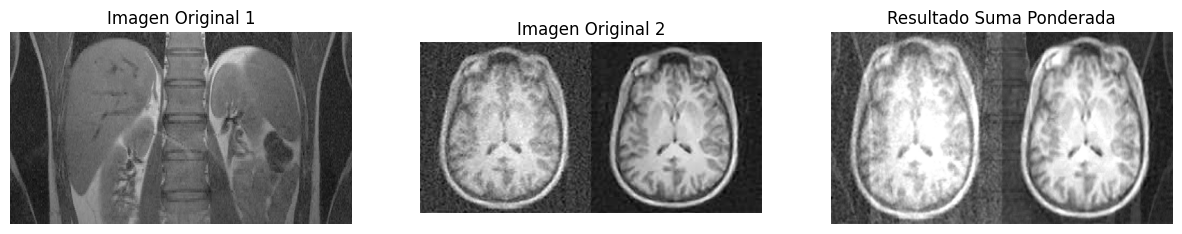

In [8]:
# Mostrar resultados de suma ponderada
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(imagen1, cmap="gray")
plt.title("Imagen Original 1")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(imagen2, cmap="gray")
plt.title("Imagen Original 2")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(imagen_resultado, cmap="gray")
plt.title("Resultado Suma Ponderada")
plt.axis("off")

plt.show()

3. Aplicar la suma promedio de las dos imágenes.

In [10]:
# Cargar varias imágenes en una lista
# Imagenes descargadas de: https://www.kaggle.com/datasets/tawsifurrahman/covid19-radiography-database/data
imagenes = ['COVID-1.png', 'COVID-100.png' , 'COVID-1000.png', 'COVID-1005.png' , 'COVID-1024.png']
imagenes_cargadas = [cv2.imread(img, cv2.IMREAD_GRAYSCALE) for img in imagenes]

# Verificar que todas las imágenes tengan el mismo tamaño
alto, ancho = imagenes_cargadas[0].shape
imagenes_cargadas = [cv2.resize(img, (ancho, alto)) for img in imagenes_cargadas]

# Crear una imagen acumuladora en formato flotante
suma = np.zeros((alto, ancho), dtype=np.float32)

# Sumar todas las imágenes
for img in imagenes_cargadas:
    suma += img

# Calcular el promedio dividiendo por la cantidad de imágenes
imagen_promedio = suma / len(imagenes_cargadas)

# Convertir la imagen a formato uint8 para su visualización
imagen_promedio = cv2.convertScaleAbs(imagen_promedio)


Resultados suma promedio

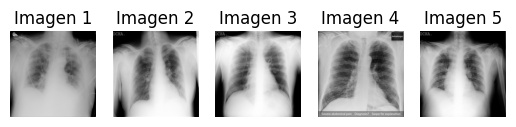

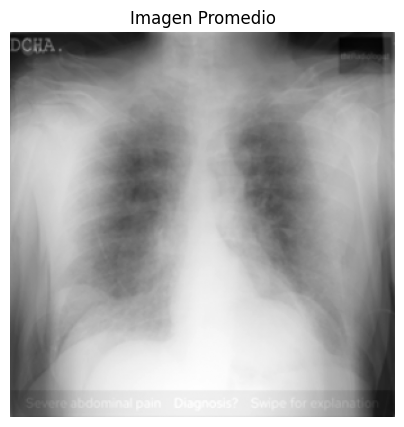

In [11]:
# Mostrar imágenes originales
for i, img in enumerate(imagenes_cargadas):
    plt.subplot(1, len(imagenes), i+1)  # Crear subgráficos en una fila
    #plt.figure(figsize=(10, 5))
    plt.imshow(img, cmap="gray")  # Mostrar imagen
    plt.title(f"Imagen {i+1}")  # Título de cada imagen
    plt.axis("off")  # Ocultar ejes

plt.show()

#Mostrar imagen promedio
plt.figure(figsize=(5, 5))
#plt.subplot(1, 3, 1)
plt.imshow(imagen_promedio, cmap="gray")
plt.title("Imagen Promedio")
plt.axis("off")
plt.show()

Ejercicio 2: Resta de imágenes.

1. Restar las dos imagenes y analizar el resultado

Cargamos nuevamente nuestros datos y redimensionamos los tamaños

In [24]:
# Cargar las dos imágenes medicas
img1 = cv2.imread('imagen 1.jpeg', cv2.IMREAD_GRAYSCALE)  # Cargar en escala de grises
img2 = cv2.imread('imagen 2.jpg' , cv2.IMREAD_GRAYSCALE)

# Asegurar que tengan el mismo tamaño
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))


2. Usar la función “cv2.absdiff” para evitar valores negativos.

In [25]:
# Realizar la resta de imágenes
resta = cv2.subtract(img2, img1)  # OpenCV maneja el rango automáticamente

3. Mostrar resultado

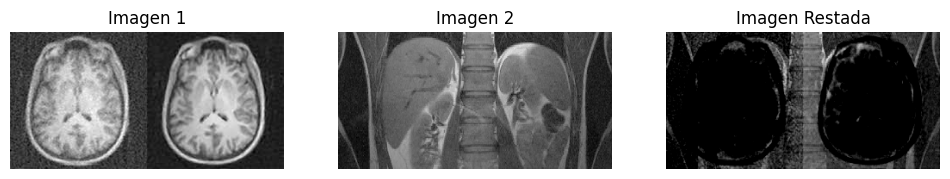

In [26]:
# Mostrar resultado
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img1, cmap='gray')
plt.title("Imagen 1")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img2, cmap='gray')
plt.title("Imagen 2")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(resta, cmap='gray')
plt.title("Imagen Restada")
plt.axis("off")

plt.show()

Ejercicio 3: Multiplicación por un factor

1. Aplicar un factor de multiplicación a cada imagen médica para modificar su brillo.

Primero trabajaremos con nuestra imagen medica 1

In [36]:
# Cargar imagen en escala de grises
img = cv2.imread('imagen 1.jpeg', cv2.IMREAD_GRAYSCALE)

# Definir los factores de multiplicación
factores = [1.2, 1.5, 1.8]

# Lista para almacenar las imágenes modificadas
imagenes_brillo = []

# Aplicar cada factor de brillo
for factor in factores:
    # Multiplicar la imagen por el factor
    img_multiplicada = cv2.multiply(img, np.array([factor], dtype=np.float32))

    # Convertir a uint8 para visualización correcta
    img_multiplicada = cv2.convertScaleAbs(img_multiplicada)

    # Guardar la imagen procesada en la lista
    imagenes_brillo.append((factor, img_multiplicada))

plt.show()

Resultados:

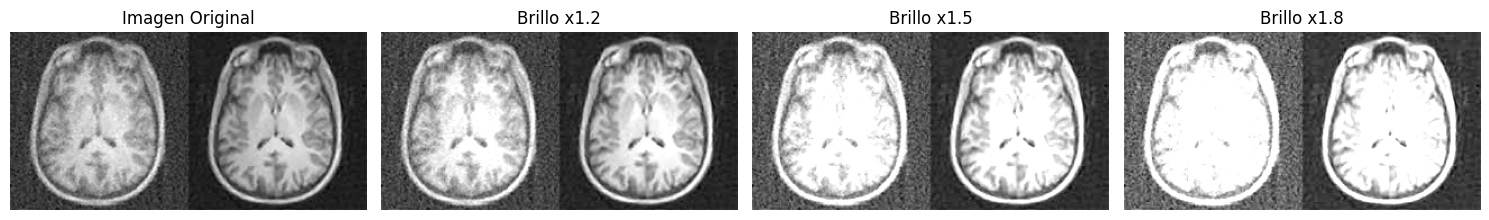

In [37]:
# Crear figura para mostrar todas las imágenes
plt.figure(figsize=(15, 4))

# Mostrar imagen original
plt.subplot(1, len(imagenes_brillo) + 1, 1)
plt.imshow(img, cmap='gray')
plt.title("Imagen Original")
plt.axis("off")

# Mostrar cada imagen modificada
for i, (factor, imagen) in enumerate(imagenes_brillo):
    plt.subplot(1, len(imagenes_brillo) + 1, i + 2)
    plt.imshow(imagen, cmap='gray')
    plt.title(f"Brillo x{factor}")
    plt.axis("off")

plt.tight_layout()
plt.show()


Ahora trabajremos con nuestra imagen medica 2

In [38]:
# Cargar imagen en escala de grises
img = cv2.imread('imagen 2.jpg', cv2.IMREAD_GRAYSCALE)

# Definir los factores de multiplicación
factores = [1.2, 1.5, 1.8]

# Lista para almacenar las imágenes modificadas
imagenes_brillo = []

# Aplicar cada factor de brillo
for factor in factores:
    # Multiplicar la imagen por el factor
    img_multiplicada = cv2.multiply(img, np.array([factor], dtype=np.float32))

    # Convertir a uint8 para visualización correcta
    img_multiplicada = cv2.convertScaleAbs(img_multiplicada)

    # Guardar la imagen procesada en la lista
    imagenes_brillo.append((factor, img_multiplicada))

plt.show()

Resultados:

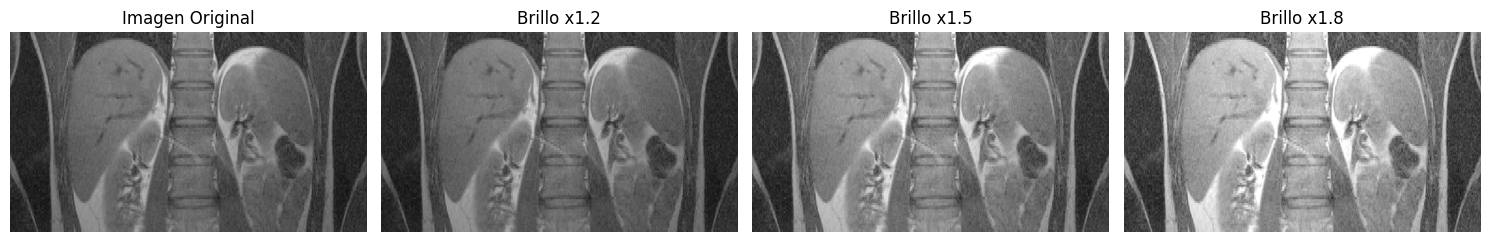

In [39]:
# Crear figura para mostrar todas las imágenes
plt.figure(figsize=(15, 4))

# Mostrar imagen original
plt.subplot(1, len(imagenes_brillo) + 1, 1)
plt.imshow(img, cmap='gray')
plt.title("Imagen Original")
plt.axis("off")

# Mostrar cada imagen modificada
for i, (factor, imagen) in enumerate(imagenes_brillo):
    plt.subplot(1, len(imagenes_brillo) + 1, i + 2)
    plt.imshow(imagen, cmap='gray')
    plt.title(f"Brillo x{factor}")
    plt.axis("off")

plt.tight_layout()
plt.show()

Ejercicio 4: Multiplicación elemento por elemento.

1. Multiplicar las dos imágenes médicas píxel a píxel.

Primero nuevamente cargaremos nuestros datos y redimensionaremos para que sea el mismo tamaño

In [42]:
# Cargar las dos imágenes medicas
img1 = cv2.imread('imagen 1.jpeg', cv2.IMREAD_GRAYSCALE)  # Cargar en escala de grises
img2 = cv2.imread('imagen 2.jpg' , cv2.IMREAD_GRAYSCALE)

# Asegurar que tengan el mismo tamaño
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

Multiplicacion de las dos imagenes pixel a pixel

In [41]:
# Multiplicación elemento a elemento
img_multiplicada = cv2.multiply(img2, img1)  # OpenCV maneja el rango automáticamente

# Convertir la imagen resultante a uint8
img_multiplicada = cv2.convertScaleAbs(img_multiplicada)

Resultados

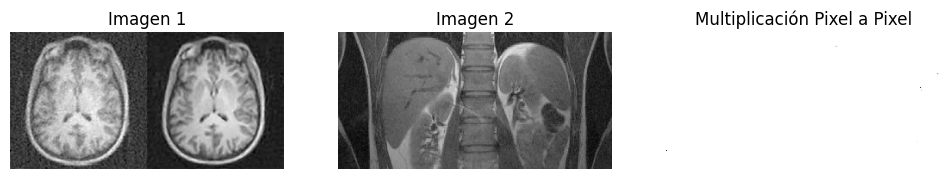

In [44]:
# Mostrar imágenes originales y resultado
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img1, cmap='gray')
plt.title("Imagen 1")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img2, cmap='gray')
plt.title("Imagen 2")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_multiplicada, cmap='gray')
plt.title("Multiplicación Pixel a Pixel")
plt.axis("off")

plt.show()

**Parte II.- Operaciones lógicas**

Ejercicio 5: Operaciones lógicas AND, OR, XOR y NOT

Primero cargaremos nuestros datos y los redimensionaremos para que sean del mismo tamaño

In [53]:
# Cargar las dos imágenes medicas
img1 = cv2.imread('imagen 1.jpeg', cv2.IMREAD_GRAYSCALE)  # Cargar en escala de grises
img2 = cv2.imread('imagen 2.jpg' , cv2.IMREAD_GRAYSCALE)

# Asegurar que tengan el mismo tamaño
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

1. Convertir imágenes a binarias (aplicar un umbral como en el proceso de segmentación).

In [65]:
# Esto simula una segmentación para separar regiones de interés (por ejemplo, tejidos o estructuras)
_, bin1 = cv2.threshold(img1, 100, 255, cv2.THRESH_BINARY)
_, bin2 = cv2.threshold(img2, 150, 255, cv2.THRESH_BINARY)

2. Implementar las funciones AND, OR, XOR entre ambas imágenes médicas.

In [66]:
and_img = cv2.bitwise_and(img1, img2)  # AND lógico
or_img = cv2.bitwise_or(img1, img2)    # OR lógico
xor_img = cv2.bitwise_xor(img1, img2)  # XOR lógico


3. Implementar función NOT en ambas imágenes.

In [67]:
not_img1 = cv2.bitwise_not(img1)       # NOT lógico en img1

Resultados:

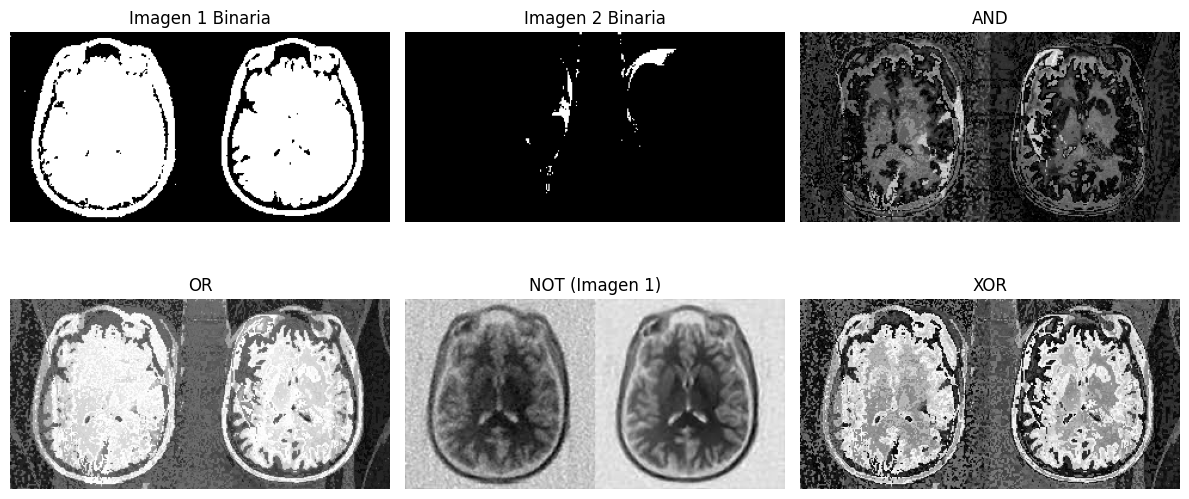

In [69]:
# Mostrar las imágenes en formato claro y ordenado
titles = [
    "Imagen 1 Binaria",
    "Imagen 2 Binaria",
    "AND",
    "OR",
    "NOT (Imagen 1)",
    "XOR"
]

images = [bin1, bin2, and_img, or_img, not_img1, xor_img]

plt.figure(figsize=(12, 6))

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()